In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

# Census API Key
from config import gkey, yelp_key, census_key
c = Census(census_key, year=2013)

In [100]:
farm_markets = pd.read_csv("CleanFM.csv")

farm_markets.columns

Index(['Unnamed: 0', 'MarketName', 'city', 'County', 'State', 'zip',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'Longitude',
       'Latitude', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime', 'Region', 'Median Age', 'Population',
       'Poverty Count', 'Household Income', 'Per Capita Income',
       'Yelp Results', 'Yelp Price', 'Yelp Rating'],
      dtype='object')

In [101]:

farm_markets_visual = farm_markets.copy()
farm_markets_visual.head()

,Unnamed: 0,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,...,updateTime,Region,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Yelp Results,Yelp Price,Yelp Rating
0,0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,05828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,...,6/20/2017 10:43:57 PM,Northeast,51.2,2011.0,186.0,52292.0,29717.0,NaN,NaN,NaN
1,1,Barre Farmers Market,Barre,Washington,Vermont,05641,05/31/2017 to 10/04/2017,Wed: 4:00 PM-7:30 PM;,NaN,NaN,...,7/4/2017 10:33:01 AM,Northeast,42.6,17298.0,1848.0,49077.0,27985.0,NaN,NaN,NaN
2,2,Bethel Farmers Market,Bethel,Windsor,Vermont,05089,NaN,NaN,NaN,NaN,...,2009,Northeast,46.2,4974.0,565.0,46097.0,27084.0,NaN,NaN,NaN
3,3,Bradford Farmers Market,Bradford,Orange,Vermont,05033,05/18/2014 to 10/19/2014,Sun: 10:00 AM-2:00 PM;,NaN,NaN,...,4/9/2014 10:03:26 AM,Northeast,40.3,2729.0,547.0,43021.0,23173.0,NaN,NaN,NaN
4,4,Brandon Farmers Market,Brandon,Rutland,Vermont,05733,05/22/2015 to 10/09/2015,Fri: 9:00 AM-2:00 PM;,NaN,NaN,...,4/23/2015 3:34:19 PM,Northeast,47.7,5799.0,580.0,53504.0,26931.0,NaN,NaN,NaN


In [102]:
farm_markets_visual["Organic"].nunique()

3

In [103]:
farm_markets_visual["Organic"].value_counts()

-    5012
Y    2372
N    1317
Name: Organic, dtype: int64

In [104]:
bins = [0, 60000, 150000, 500000]

# Create the names for the four bins
group_names = ["Low Income", "Medium Income", "High Income"]

farm_markets_visual["Income Group"] = pd.cut(farm_markets_visual["Household Income"], bins, labels=group_names)
#farm_markets_visual 

#market_by_income = farm_markets_visual.groupby["Income Group"]["Organic"].count()

In [105]:
income_byzip = farm_markets_visual.groupby(["zip"])["Household Income"].mean().reset_index(name="income")
income_byzip = income_byzip.set_index("zip")
income_byzip1= income_byzip["income"]

In [106]:
income_byzip.head(5)

,income
zip,
00000,NaN
00601,12041.0
00603,15485.0
00606,15019.0
00610,16707.0


In [107]:
marketcount_byzip=farm_markets_visual.groupby(["zip"])["MarketName"].count().reset_index(name="market_count")
marketcount_byzip = marketcount_byzip.set_index("zip")
marketcount1=marketcount_byzip["market_count"]

In [108]:
marketcount_byzip.head(5)

,market_count
zip,
00000,1
00601,2
00603,1
00606,1
00610,1


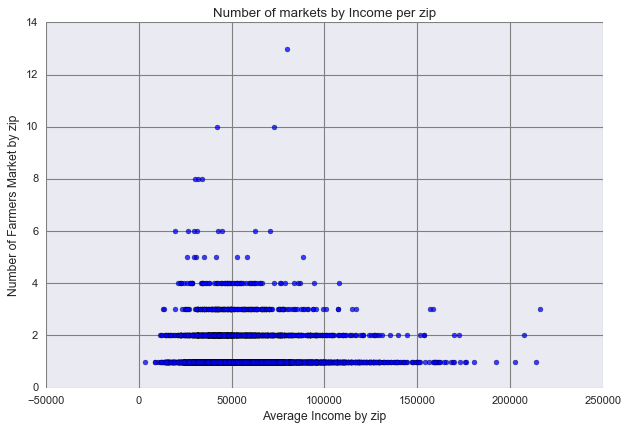

In [128]:

#plt.style.use('seaborn')
plt.scatter(income_byzip1, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyIncome")
# Place a legend on the chart in what matplotlib believes to be the "best" location 'bmh'
#plt.legend(loc="best",title="City Type")

plt.title("Number of markets by Income per zip")
plt.xlabel("Average Income by zip")
plt.ylabel("Number of Farmers Market by zip")

plt.grid(b=None,which='major',axis='both',color='grey')

#plt.savefig("MarketByIncome.png")
# Print our chart to the screen
plt.show()

In [129]:
population_byzip=farm_markets_visual.groupby(["zip"])["Population"].sum()
population_byzip_df= pd.DataFrame(population_byzip)
#population_byzip_df

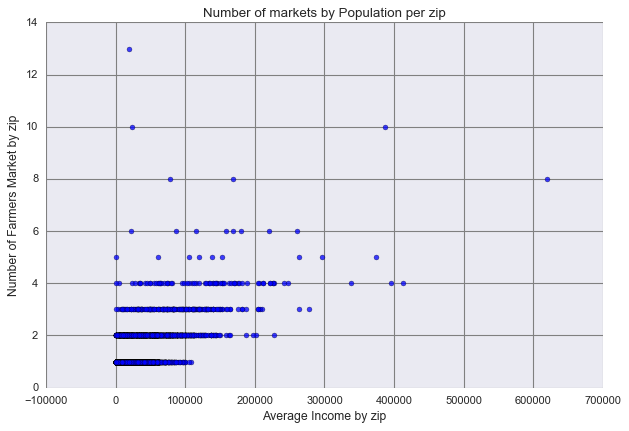

In [130]:
#plt.style.use('seaborn')
plt.scatter(population_byzip, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyPopulation")
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best",title="City Type")

plt.title("Number of markets by Population per zip")
plt.xlabel("Average Income by zip")
plt.ylabel("Number of Farmers Market by zip")

plt.grid(b=None,which='major',axis='both',color='grey')
#plt.savefig("MarketByPopulation.png")
# Print our chart to the screen
plt.show()

In [131]:
# Create the names for the four bins
bins = [0, 40000, 70000, 500000]
group_names = ["Low Income", "Medium Income", "High Income"]

In [132]:
farm_markets_visual["Income Group"] = pd.cut(farm_markets_visual["Household Income"], bins, labels=group_names)
#farm_markets_visual 

In [133]:
market_byincome=farm_markets_visual.groupby(["Income Group"])["MarketName"].count()
market_byincome_df= pd.DataFrame(market_byincome)

In [134]:
market_byincome_df

,MarketName
Income Group,
Low Income,2188
Medium Income,4539
High Income,1726


In [135]:
farm_markets_visual["Organic"] = farm_markets_visual["Organic"].replace(r'-', 'Z', regex=True)

In [136]:
farm_markets_visual["Organic"].nunique()

3

In [137]:
farm_markets_visual["Household Income"].describe()

count      8453.000000
mean      54949.009582
std       23265.605622
min        3404.000000
25%       39660.000000
50%       49466.000000
75%       65287.000000
max      216037.000000
Name: Household Income, dtype: float64

In [138]:
market_by_income_df2 = farm_markets_visual.groupby(["Income Group","Organic"])["MarketName"].count().reset_index(name="market_count")
market_by_income_df2

,Income Group,Organic,market_count
0,Low Income,N,409
1,Low Income,Y,465
2,Low Income,Z,1314
3,Medium Income,N,646
4,Medium Income,Y,1167
5,Medium Income,Z,2726
6,High Income,N,232
7,High Income,Y,667
8,High Income,Z,827


In [139]:
#market_by_income_df3=market_by_income_df2.loc[market_by_income_df2["Income Group"]=="Low Income"]
#low_group=market_by_income_df3["market_count"]
#low_group

#market_by_income_df4=market_by_income_df2.loc[market_by_income_df2["Income Group"]=="Medium Income"]
#med_group=market_by_income_df4["market_count"]
#med_group

#market_by_income_df5=market_by_income_df2.loc[market_by_income_df2["Income Group"]=="High Income"]
#high_group=market_by_income_df5["market_count"]
#high_group

market_by_income_df3=market_by_income_df2.loc[market_by_income_df2["Organic"]=="Y"]
organic_group=market_by_income_df3["market_count"]
#organic_group

market_by_income_df4=market_by_income_df2.loc[market_by_income_df2["Organic"]=="N"]
nonorganic_group=market_by_income_df4["market_count"]
#nonorganic_group

market_by_income_df5=market_by_income_df2.loc[market_by_income_df2["Organic"]=="Z"]
unknown_group=market_by_income_df5["market_count"]
#unknown_group

In [140]:
# set width of bar
barWidth = 0.25

# set height of bar
market1 = [x1 for x1 in nonorganic_group]
market2 = [x2 for x2 in organic_group]
market3 = [x3 for x3 in unknown_group]

# Set position of bar on X axis
r1 = np.arange(len(market1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


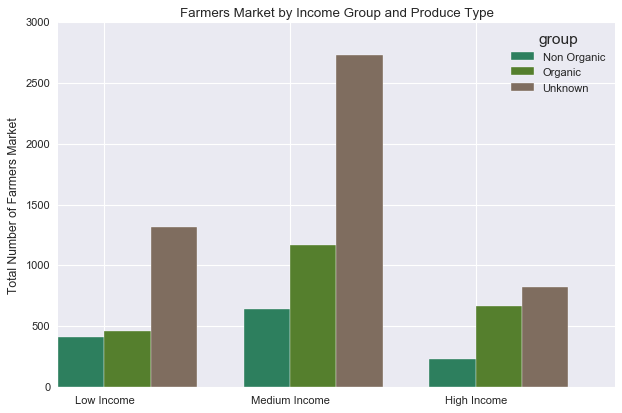

In [142]:
group = market_by_income_df2["Income Group"].unique()


#plt.legend(loc="best",title="group")
# Make the plot
plt.bar(r1, market1, color='#2d7f5e', width=barWidth, edgecolor='white', label='Non Organic')
plt.bar(r2, market2, color='#557f2d', width=barWidth, edgecolor='white', label='Organic')
plt.bar(r3, market3, color='#7f6d5f', width=barWidth, edgecolor='white', label='Unknown')

#plt.xlabel('Income group', fontweight='bold')
plt.legend(loc="best",title="group")

plt.title("Farmers Market by Income Group and Produce Type")
plt.ylabel("Total Number of Farmers Market")
plt.xticks([r + barWidth for r in range(len(market1))], ['Low Income', 'Medium Income', 'High Income'])
# Print our chart to the screen 

plt.savefig("MarketByIncomeAndProduceType.png")
plt.show()